# SALARY PREDICTION REGRESSION MODEL

In [1]:
import pandas as pd    # importing pandas library
import numpy as np     # importing numpy library

## Reading the data from the csv files

In [2]:
df = pd.read_csv('ML case Study.csv')   # reading,converting and storing the data as Dataframe using pandas
df.head()                               # printing the top 5 values in the data

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [3]:
college = pd.read_csv('Colleges.csv')   # converting the college csv file into dataframe
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [4]:
city = pd.read_csv('cities.csv')    # converting the city csv into dataframe
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


## Checking for Missing values

In [5]:
df.isna().sum()    # checking for null values in all the columns

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

### NO null values found

In [6]:
df.info()      # checking for the data type of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


## Checking for Outliers

In [7]:
df.describe()    # checking mean, standard deviations and outliers

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


## VISUALIZATIONS TO FIND OUTLIERS

In [8]:
import seaborn as sns                  # importing seaborn library
import matplotlib.pyplot as plt        # importing matplotlib library
%matplotlib inline

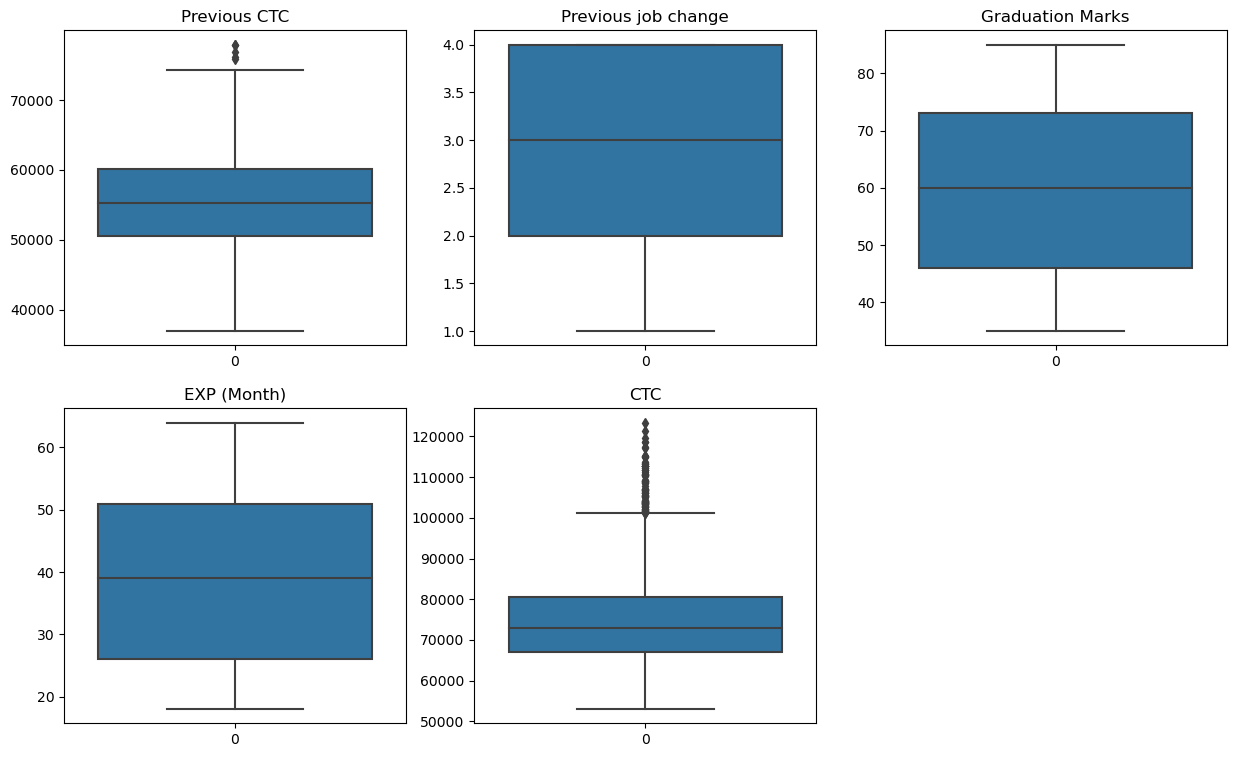

In [9]:
col = ['Previous CTC', 'Previous job change','Graduation Marks', 'EXP (Month)', 'CTC']     # columns for which boxplot is needed
plt.figure(figsize=(15,9))                                                                 # setting the size of the plotted graphs
for i in range(5):
    plt.subplot(2,3,i+1)                                                                   # printing the boxplot in row wise
    plt.title(col[i])                                                                      # printing title for each boxplot
    sns.boxplot(df[col[i]])                                                                # plotting the boxplot

### Found outliers in 'Previous CTC' and 'CTC' variable

## Scaling the Outliers to improve the model

In [10]:
uv_p_ctc = np.percentile(df['Previous CTC'],[99])[0]    # Finding the value at 99 percentitle in 'Previous CTC' variable

In [11]:
df[(df['Previous CTC'] > uv_p_ctc)]       # Finding all th values which has 'Previous CTC' above the 99% value

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
116,"MSIT, Delhi",Delhi,Executive,77911.0,1,50,58,87831.62
292,"USIT, Delhi",Kozhikode,Manager,74198.0,1,57,25,99644.51
543,NSUT Delhi (NSIT),Kolkata,Manager,73856.0,1,75,54,121362.73
572,IIT ISM Dhanbad,Surat,Executive,71543.0,4,82,30,61366.78
701,DAIICT,Kozhikode,Executive,71549.0,4,47,50,83116.21
847,NIT Warangal,Kolkata,Executive,71756.0,4,67,23,72141.43
860,BITS Pilani (Goa Campus),Delhi,Manager,75785.0,4,63,37,110338.25
941,Manipal Main Campus,Chennai,Executive,72319.0,1,51,50,63538.43
1024,IIT Kharagpur,Bangalore,Executive,72661.0,3,74,47,70238.70
1047,IIT BHU (Varanasi),Kolhapur,Manager,73214.0,4,57,22,100119.53


In [12]:
df[(df['Previous CTC'] > 2*uv_p_ctc)]                  # checking for extreme outliers which are more than 2 times the 99% value

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC


### We found some outliers in the 'Previous CTC' variable but to avoid aggressive capping a multiplier '2' was used but we could not find any extreme outliers which were far apart (that is greater than 2 times the 99% value)

In [13]:
uv_ctc = np.percentile(df['CTC'],[99])[0]                        # Finding the value at 99 percentitle in 'CTC' variable
uv_ctc

112826.26

In [14]:
df[(df['CTC'] > uv_ctc)]                                        # Finding all th values which has 'Previous CTC' above the 99% value

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
34,IIIT Hyderabad,Durgapur,Manager,60894.0,4,80,28,118651.89
185,IIIT Lucknow,Durgapur,Manager,70258.0,4,38,36,115126.75
254,NIT Kurukshetra,Bangalore,Manager,51912.0,2,66,50,113141.14
328,"KIIT, Bhubaneswar",Kolhapur,Manager,62264.0,2,52,64,114996.23
543,NSUT Delhi (NSIT),Kolkata,Manager,73856.0,1,75,54,121362.73
577,TIET/Thapar University,Chennai,Manager,59101.0,3,56,31,113843.16
668,IIT Delhi,Delhi,Manager,60476.0,1,85,62,113212.07
883,Amity University,Chennai,Manager,64930.0,1,66,51,114939.65
1146,BITS Pilani (Goa Campus),Kolkata,Manager,61709.0,4,39,60,117207.24
1230,IIIT Lucknow,Asansol,Manager,60298.0,1,47,52,123416.99


In [15]:
df[(df['CTC'] > 2*uv_ctc)]   # checking for extreme outliers which are more than 2 times the 99% value

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC


### similar to 'Previous CTC' variable the the outlier values in 'CTC' are not extreme that is more than twice that of the 99% value

## SOME EXTRA VISUALIZATIONS TO UNDERSTAND THE DISTRIBUTION OF DATA 

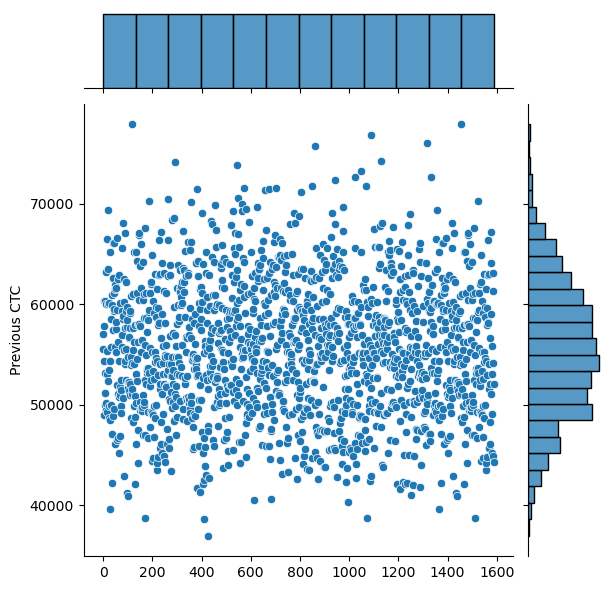

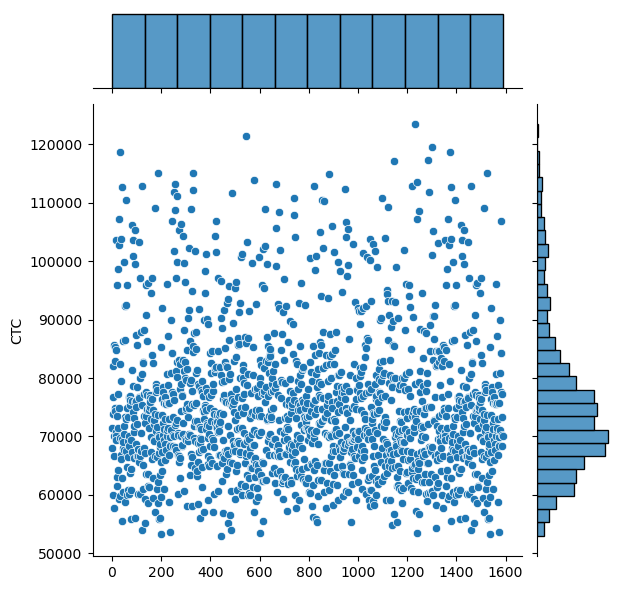

In [16]:
sns.jointplot(df['Previous CTC'])                      # joint plot for 'Previous CTC' column
sns.jointplot(df['CTC'])                               # joint plot for 'CTC' column

<Axes: xlabel='Role', ylabel='count'>

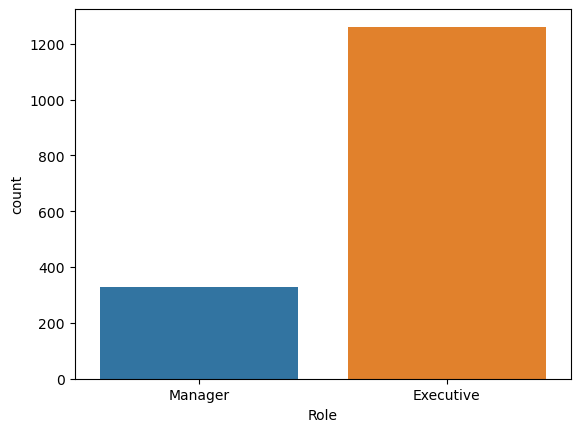

In [17]:
sns.countplot(data = df, x = 'Role')                   # countplot for the 'Role' column

### since the 'Role' column has both Manager and Executive values so we need not remove it

## CONVERTING THE 'COLLEGE' AND 'CITY' FIELDS TO NUMERICAL VALUES

In [18]:
tier1 = college['Tier 1'].to_list()  # converting the columns in college dataframe to lists
tier2 = college['Tier 2'].to_list()
tier3 = college['Tier 3'].to_list()

In [19]:
tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [20]:
for item in df.College:  # replacing the values in the 'college' column of 'df' dataframe to numerical value according to the tier list
    if item in tier1:
        df['College'].replace(item,1,inplace=True)
    elif item in tier2:
        df['College'].replace(item,2,inplace=True)
    elif item in tier3:
        df['College'].replace(item,3,inplace=True)

In [21]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [22]:
df.College.unique() # checking the unique values of college field

array([2, 3, 1], dtype=int64)

In [23]:
metro = city['Metrio City'].to_list() # converting the columns in the 'city' dataframe to list
no_metro = city['non-metro cities'].to_list()

In [24]:
metro

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [25]:
for item in df.City: # converting the 'city' column to numerical value
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in no_metro:
        df['City'].replace(item,0,inplace=True)

In [26]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [27]:
df.info()                           # checking for null values and data type after the conversion to numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


## CONVERTING THE VALUES IN THE 'Role' FIELD TO DUMMY VARIABLES

In [28]:
df1 = pd.get_dummies(df,columns = ['Role'],drop_first=True) #converting to dummy variables

In [29]:
df1.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [30]:
df1.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


### ALL the variables are now converted to numerical values for training the model

## SPLITTING THE DATA INTO INDEPENDENT AND DEPENDENT(TARGET) VARIABLES X And y RESPECTIVLY

In [31]:
X = df1.drop('CTC',axis=1)          # splitting the data into X and y
y = df1.CTC

In [32]:
X.head()                            # contains independent variables

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [33]:
y.head()                            # contains the dependent variable

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

## SPLITTING THE DATA INTO TRAIN AND TEST

In [34]:
from sklearn.model_selection import train_test_split   #importing train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)        # splitting the data into train and test

In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape                                     # printing the shape

((1271, 7), (318, 7), (1271,), (318,))

## Scaling the data for any model that requires it

In [37]:
from sklearn.preprocessing import StandardScaler                                          # importing standardscaler to scale the data

In [38]:
scaler = StandardScaler().fit(X_train)                                                    # scaling the X_train data
X_train_s = scaler.transform(X_train)

In [39]:
scaler = StandardScaler().fit(X_test)                                                     # scaling the X_test data
X_test_s = scaler.transform(X_test)

In [40]:
X_train_s

array([[-1.17773695, -1.02147362,  0.90628558, ...,  1.58202812,
         1.40303652,  1.95304735],
       [-1.17773695,  0.9789778 ,  0.66310061, ..., -0.9002232 ,
         0.13018897, -0.51202036],
       [-1.17773695, -1.02147362,  1.07214102, ...,  0.70988577,
         1.40303652, -0.51202036],
       ...,
       [ 1.20586761,  0.9789778 , -0.38741666, ...,  1.3807645 ,
         0.05947522, -0.51202036],
       [-1.17773695, -1.02147362,  0.17613353, ...,  0.30735853,
        -1.42551359, -0.51202036],
       [-1.17773695,  0.9789778 , -2.19555438, ...,  0.10609491,
        -0.43552105, -0.51202036]])

## TRAINING DIFFERENT MODELS TO DETERMINE THE BEST MODEL FOR THE PROBLEM

In [41]:
from sklearn.metrics import r2_score,mean_squared_error                             # importing r2_score and mse to measure the score

In [42]:
from sklearn.model_selection import GridSearchCV                                    # importing GridSearchCV

## LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression                                   # importing linearRegression

In [44]:
linear_params = {                                                                   # params for Linear Regression
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}
gv_lr = GridSearchCV(LinearRegression(),cv=5,param_grid =linear_params,n_jobs= -1)  # performing grid Search cv to find best parameters
gv_lr.fit(X_train,y_train)
gv_lr.best_params_, gv_lr.best_score_                                               # printing best parameters and its score

({'copy_X': True, 'fit_intercept': True}, 0.5258185031375933)

In [45]:
lrr = gv_lr.best_estimator_                                                         # loading the best model with best parameters
lrr.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,lrr.predict(X_train))},mse = {mean_squared_error(y_train,lrr.predict(X_train))}')   # printing training score
print(f'test: r2 = {r2_score(y_test,lrr.predict(X_test))},mse = {mean_squared_error(y_test,lrr.predict(X_test))}')        # printing test score

train: r2 = 0.5331293335456955,mse = 75086299.73658578
test: r2 = 0.5355989894790061,mse = 68909870.69952606


In [46]:
lrr.intercept_

36989.4282547949

## RIDGE

In [47]:
from sklearn.linear_model import Ridge                                             # importing Ridge regression

In [48]:
ridge_params = {                                                                   # parameter grid for ridge regression
    'alpha': [0.001, 0.01,0.05, 0.1,0.2,0.5,0.7, 1, 10],
    'max_iter': [500, 1000, 5000, 10000]
}
gv_rr = GridSearchCV(Ridge(),cv=5,param_grid =ridge_params,n_jobs= -1)             # performing grid Search cv to find best parameters
gv_rr.fit(X_train,y_train)
gv_rr.best_params_, gv_rr.best_score_                                              # printing best parameters and its score

({'alpha': 0.5, 'max_iter': 500}, 0.5258211449998715)

In [49]:
rr = gv_rr.best_estimator_
rr.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,rr.predict(X_train))},mse = {mean_squared_error(y_train,rr.predict(X_train))}')
print(f'test: r2 = {r2_score(y_test,rr.predict(X_test))},mse = {mean_squared_error(y_test,rr.predict(X_test))}')     

train: r2 = 0.5331271617253823,mse = 75086649.0280764
test: r2 = 0.5354822442766555,mse = 68927193.86768572


## LASSO

In [50]:
from sklearn.linear_model import Lasso                                             # importing Lasso

In [51]:
lasso_params = {                                                                   # parameter grid for Lasso
    'alpha': [0.001, 0.01,0.05, 0.1, 0.5, 1, 10],
    'max_iter': [100, 500, 1000, 5000, 10000]
}
gv_ll = GridSearchCV(Lasso(),cv=5,param_grid =lasso_params,n_jobs= -1)             # performing grid Search cv to find best parameters
gv_ll.fit(X_train,y_train)
gv_ll.best_params_, gv_ll.best_score_                                              # printing best parameters and its score

({'alpha': 10, 'max_iter': 100}, 0.525825033657993)

In [52]:
ll = gv_ll.best_estimator_                                                         # loading the best model with best parameters
ll.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,ll.predict(X_train))},mse = {mean_squared_error(y_train,ll.predict(X_train))}')  # printing training score
print(f'test: r2 = {r2_score(y_test,ll.predict(X_test))},mse = {mean_squared_error(y_test,ll.predict(X_test))}')       # printing test score

train: r2 = 0.5331217074776193,mse = 75087526.22879128
test: r2 = 0.5357156319978797,mse = 68892562.76799372


## KNeighbors Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor                                  # importing KNearestNeighbors Regression

In [54]:
knn_params = {                                                                     # parameter grid for KNearest Neighbors regression
    'n_neighbors': [3, 5, 7, 10, 15,20,25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
gv_knn = GridSearchCV(KNeighborsRegressor(),knn_params,cv=5,n_jobs=-1,scoring='max_error')   # performing grid Search cv to find best parameters
gv_knn.fit(X_train_s,y_train)
gv_knn.best_params_, gv_knn.best_score_                                                      # printing best parameters and its score

({'algorithm': 'auto', 'n_neighbors': 25, 'p': 2, 'weights': 'uniform'},
 -29773.788000000008)

In [55]:
knn = gv_knn.best_estimator_                                                                 # loading the best model with best parameters
knn.fit(X_train_s,y_train)
print(f'train: r2 = {r2_score(y_train,knn.predict(X_train_s))},mse = {mean_squared_error(y_train,knn.predict(X_train_s))}')  # printing training score
print(f'test: r2 = {r2_score(y_test,knn.predict(X_test_s))},mse = {mean_squared_error(y_test,knn.predict(X_test_s))}')       # printing test score

train: r2 = 0.5936403011892695,mse = 65354386.85299718
test: r2 = 0.5683356025028306,mse = 64052267.63772096


## Decision Tree

In [56]:
from sklearn import tree                                                                     # importing tree library

In [57]:
dt_params = {                                                                                # parameter grid for Decision tree regression
    'max_depth': [None,2,5,3,4, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gv_dt = GridSearchCV(tree.DecisionTreeRegressor(),dt_params,cv=5,n_jobs=-1)                  # performing grid Search cv to find best parameters
gv_dt.fit(X_train,y_train)
gv_dt.best_params_, gv_knn.best_score_                                                       # printing best parameters and its score

({'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2},
 -29773.788000000008)

In [58]:
dtt = gv_dt.best_estimator_                                                                  # loading the best model with best parameters
dtt.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,dtt.predict(X_train))},mse = {mean_squared_error(y_train,dtt.predict(X_train))}')   # printing training score
print(f'test: r2 = {r2_score(y_test,dtt.predict(X_test))},mse = {mean_squared_error(y_test,dtt.predict(X_test))}')         # printing test score

train: r2 = 0.6397831325660944,mse = 57933285.64360235
test: r2 = 0.6032204390654169,mse = 58875901.690099366


## RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestRegressor                                           # importing Random Forest

In [60]:
rf_params = {                                                                                # parameter grid for Random Forest regression
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None,1,2,3,4,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gv_rf = GridSearchCV(RandomForestRegressor(),cv=5,param_grid =rf_params,n_jobs= -1,scoring='max_error')   # performing grid Search cv to find best parameters
gv_rf.fit(X_train,y_train)
gv_rf.best_params_,gv_rf.best_score_                                                                      # printing best parameters and its score

({'max_depth': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 50},
 -29405.320695776834)

In [61]:
rff = gv_rf.best_estimator_                                                                              # loading the best model with best parameters
rff.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,rff.predict(X_train))},mse = {mean_squared_error(y_train,rff.predict(X_train))}')     # printing training score
print(f'test: r2 = {r2_score(y_test,rff.predict(X_test))},mse = {mean_squared_error(y_test,rff.predict(X_test))}')          # printing test score

train: r2 = 0.6287878939841323,mse = 59701637.86438016
test: r2 = 0.6146566418318207,mse = 57178947.47149778


## BAGGING

In [62]:
from sklearn.ensemble import BaggingRegressor                                                 # importing Bagging Regressor           

In [63]:
bagging_params = {                                                                            # parameter grid for Bagging regression
    'n_estimators': [100, 200, 500],
    'max_samples': [0.1,0.2,0.5,1.0],
    'max_features': [0.1,0.2,0.5,1.0],
    'bootstrap': [True, False]
}
gv_bag = GridSearchCV(BaggingRegressor(),cv=5,param_grid =bagging_params,n_jobs= -1,scoring='max_error')  # performing grid Search cv to find best parameters
gv_bag.fit(X_train,y_train)
gv_bag.best_params_,gv_bag.best_score_                                                                    # printing best parameters and its score

({'bootstrap': True,
  'max_features': 1.0,
  'max_samples': 0.1,
  'n_estimators': 500},
 -29762.991512)

In [64]:
bag = gv_bag.best_estimator_                                                                        # loading the best model with best parameters
bag.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,bag.predict(X_train))},mse = {mean_squared_error(y_train,bag.predict(X_train))}')   # printing training score
print(f'test: r2 = {r2_score(y_test,bag.predict(X_test))},mse = {mean_squared_error(y_test,bag.predict(X_test))}')        # printing test score

train: r2 = 0.6827725514218301,mse = 51019344.3282952
test: r2 = 0.620684206227421,mse = 56284550.875185646


## Gradient Boost

In [65]:
from sklearn.ensemble import GradientBoostingRegressor                                              # importing Gradient Boost

In [66]:
gb_params = {                                                                                       # parameter grid for Gradient Boost regression
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01,0.02, 0.05, 0.1, 0.5,0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gv_gb = GridSearchCV(GradientBoostingRegressor(),cv=5,param_grid =gb_params,n_jobs= -1,scoring='max_error')  # performing grid Search cv to find best parameters
gv_gb.fit(X_train,y_train)
gv_gb.best_params_,gv_gb.best_score_                                                                         # printing best parameters and its score

({'learning_rate': 0.02,
  'max_depth': 3,
  'min_samples_leaf': 4,
  'min_samples_split': 5,
  'n_estimators': 100,
  'subsample': 0.8},
 -28632.28093471973)

In [67]:
gb = gv_gb.best_estimator_                                                                  # loading the best model with best parameters
gb.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,gb.predict(X_train))},mse = {mean_squared_error(y_train,gb.predict(X_train))}')   # printing training score
print(f'test: r2 = {r2_score(y_test,gb.predict(X_test))},mse = {mean_squared_error(y_test,gb.predict(X_test))}')        # printing test score

train: r2 = 0.6335849307470578,mse = 58930135.67735273
test: r2 = 0.6071138862409677,mse = 58298174.82180153


## ADA BOOST

In [68]:
from sklearn.ensemble import AdaBoostRegressor                                              # importing Ada Boost Regressor

In [69]:
ada_params = {                                                                              # parameter grid for Ada boost regression
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01,0.02, 0.05, 0.1, 0.5, 0.2]
}

gv_ada = GridSearchCV(AdaBoostRegressor(),cv=5,param_grid =ada_params,n_jobs= -1,scoring='r2')  # performing grid Search cv to find best parameters
gv_ada.fit(X_train,y_train)
gv_ada.best_params_,gv_ada.best_score_                                                          # printing best parameters and its score

({'learning_rate': 0.01, 'n_estimators': 100}, 0.5960827354215101)

In [70]:
ada = gv_ada.best_estimator_                                                                   # loading the best model with best parameters
ada.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,ada.predict(X_train))},mse = {mean_squared_error(y_train,ada.predict(X_train))}')  # printing training score
print(f'test: r2 = {r2_score(y_test,ada.predict(X_test))},mse = {mean_squared_error(y_test,ada.predict(X_test))}')        # printing test score

train: r2 = 0.6251234319869312,mse = 60290989.28794425
test: r2 = 0.6144195616813302,mse = 57214126.47013387


## XGBOOST

In [71]:
import xgboost as xgb                                                                          # importing XGBoost 

In [72]:
xgb_params = {                                                                                 # parameter grid for XGBoost regression
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01,0.2, 0.05, 0.1, 0.5, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

gv_xgb = GridSearchCV(xgb.XGBRegressor(),cv=5,param_grid =xgb_params,n_jobs= -1,scoring='max_error')   # performing grid Search cv to find best parameters
gv_xgb.fit(X_train,y_train)
gv_xgb.best_params_,gv_xgb.best_score_                                                                 # printing best parameters and its score

({'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 5,
  'n_estimators': 50,
  'subsample': 1.0},
 -29894.8919375)

In [73]:
xgb = gv_xgb.best_estimator_                                                                       # loading the best model with best parameters
xgb.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,xgb.predict(X_train))},mse = {mean_squared_error(y_train,xgb.predict(X_train))}')  # printing training score
print(f'test: r2 = {r2_score(y_test,xgb.predict(X_test))},mse = {mean_squared_error(y_test,xgb.predict(X_test))}')       # printing test score

train: r2 = 0.6715064833366085,mse = 52831253.76249506
test: r2 = 0.6109878145790599,mse = 57723344.24471541


## Bagging model gave the top r2_score

# 1. Your views about the problem statement?

### Problem Statement: Create a machine learning model which will help the company in determining the salary of newly hired employees using the given data.
### I think it is good to determine the CTC for employees using machine learning model for the following reasons:
### 1. since ML models does not have human emotions it would give the best result when determining the CTC without any partiality. 
### 2. Once trained with enough correct data the ML model will make the work easy and effective. 
### 3. Can handle a large amount of workload without getting tired.

# 2. What will be your approach to solving this task?

### 1. Gathering the data: that is collecting required data in csv files.
### 2. Data preprocessing: to read the files, then check for missing values if found treat the missing values next find if there are any outliers in the data if found treat or scale them so they do not effect the model negativly.
### 3. Data visualization: this helps in finding outliers as well as finding which columns to keep or not, we also get to know the data distribution.
### 4. Dummy variables: creating dummuy variables for all the categorical columns in the data.
### 5. Splitting Data: split the data into X and y and then split into train and test to check the effectivness of the model with the test data.
### 6. Model training: Train all the available models depending on the requirements then find the one which does not overfit and gives best score

# 3. What were the available ML model options you had to perform this task?

### There are many available models some of them which I know and used in the project are:
1. Linear Regression
2. Ridge Regression
3. Lasso
4. KNearest Regression
5. Decision Tree Regression
6. Bagging Regression
7. Gradient Boosting Regression
8. Ada Boosting Regression
9. XGBoost Regression

# 4. Which model’s performance is best and what could be the possible reason for that?

### When I trained all the regression models BAGGING REGRESSION model gave me the best result that is the r2_score without any overfitting when compared to all the other models. The difference was not much large but still it performed well.
### the possible reasons could be:
#### 1. Because it is a ensemble method where the result is based on the aggregate of multiple models and not on a single model.
#### 2. Maybe because of the hyperparameters choosen during the model training

# 5. What steps can you take to improve this selected model’s performance even further?


## There are many methods to improve a model's performance:
### 1. We can try to increase the data size available to us and it should be more accurate.
### 2. We can try to increase the performance by changing the hyperparameters of the model, through this we can not only increase model performance we can also decrease overfitting.
### 3. Lastly we can also try to improve the data preprocessing like handling outliers etc.

In [91]:
bagging_params = {                                                                            # parameter grid for Bagging regression
    'n_estimators': [100,150,250, 200, 500],
    'max_samples': [0.1,0.2,0.5,1.0],
    'max_features': [0.1,0.2,0.5,1.0],
    'bootstrap': [True, False]
}
gv_bag = GridSearchCV(BaggingRegressor(),cv=5,param_grid =bagging_params,n_jobs= -1,scoring='max_error')
gv_bag.fit(X_train,y_train)
gv_bag.best_params_,gv_bag.best_score_

({'bootstrap': False,
  'max_features': 1.0,
  'max_samples': 0.1,
  'n_estimators': 500},
 -29983.42044399998)

In [92]:
bag = gv_bag.best_estimator_
bag.fit(X_train,y_train)
print(f'train: r2 = {r2_score(y_train,bag.predict(X_train))},mse = {mean_squared_error(y_train,bag.predict(X_train))}')
print(f'test: r2 = {r2_score(y_test,bag.predict(X_test))},mse = {mean_squared_error(y_test,bag.predict(X_test))}')           # printing the scores

train: r2 = 0.6858700135998628,mse = 50521182.866816305
test: r2 = 0.6219645845793544,mse = 56094562.68678956
